<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_11_Fourier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
π = np.pi

In [ ]:
def plot_axis(splot, x, xlabel, y, ylabel, xlim=False, ylim=False):
    splot.plot(x, y)
    if splot == plt:
        splot.xlabel(xlabel)
        splot.ylabel(ylabel)
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
    else:
        splot.set_xlabel(xlabel)
        splot.set_ylabel(ylabel)
        if xlim:
            splot.set_xlim(xlim)
        if ylim:
            splot.set_ylim(ylim)
    splot.axhline(y=0, color='k')
    splot.axvline(x=0, color='k')
    splot.grid()

#The sine wave

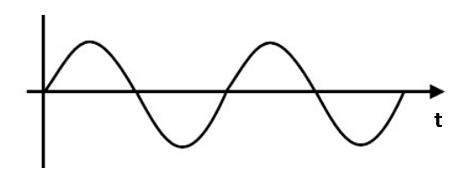

The units ($t$) of $S(t)=sin(t)$ are in angles (radians).

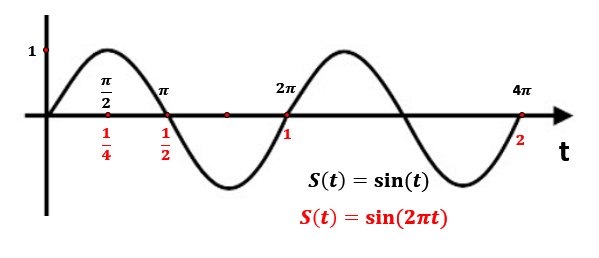

The units ($t$) of $S(t)=sin(2\pi t)$ are in cycles.

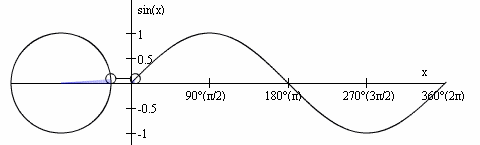

**1 cycle = $360^o=2\pi$**

Frequency ($f$): $S_f(t)=sin(2\pi ft)$

defines number of units in one cycle

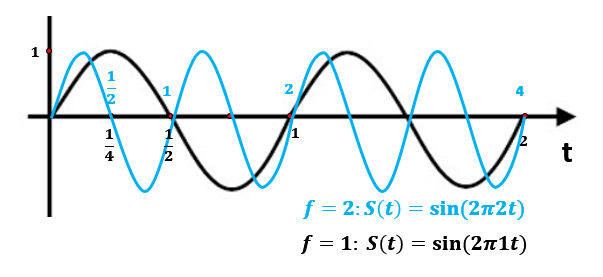

Examples:
- **91.8FM**
- **Electricity in Israel: A=220V, f=50Hz**

Amplitude ($A$): $S(t)=A\times sin(2\pi ft)$

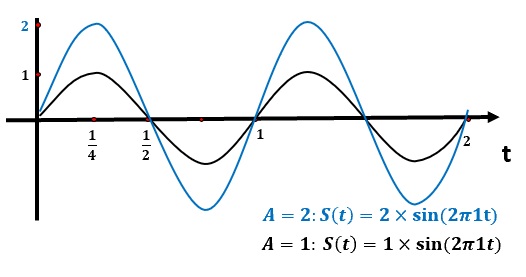

Phase ($\phi)$: $S(t)=A\times sin(2\pi ft+\phi)$

This is a shift along the X axis. Units of $\phi$ are radians.

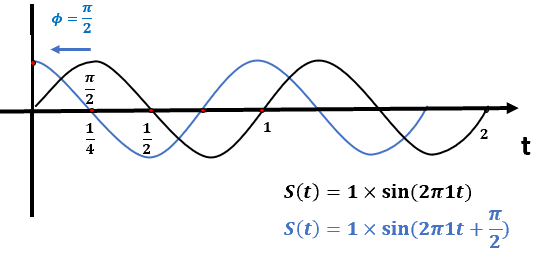

##Sine wave demo

In [ ]:
sampling_frequency = 1000
sampling_interval = 1 / sampling_frequency
begin_time = 0
end_time = 100
x = np.arange(begin_time, end_time, sampling_interval)

In [ ]:
def sin_func(A,F,Φ):
    y = A * np.sin(2 * π * x * F + π*Φ)
    pos_ylim = np.max([np.ceil(np.max(np.abs(y)))+1, 1])
    ylim = [-pos_ylim, +pos_ylim]
    plot_axis(plt, x, 'Time', y, 'A', xlim=[0, 3], ylim=ylim)
    plt.show()

interactive(sin_func,A=(-2,4.0, 0.25),F=(-2.0,4.0, 0.5), Φ=(-4.0,4.0, 0.5))

interactive(children=(FloatSlider(value=1.0, description='A', max=4.0, min=-2.0, step=0.25), FloatSlider(value…

#Fourier Transformation (FT)

FT transforms from the standard basis to the frequencies basis

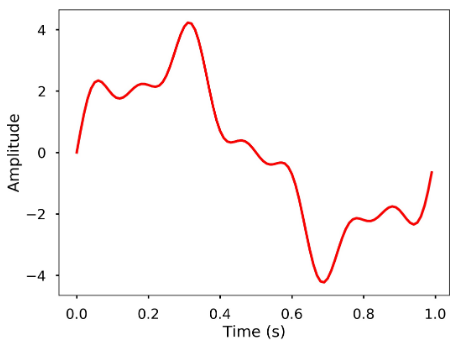

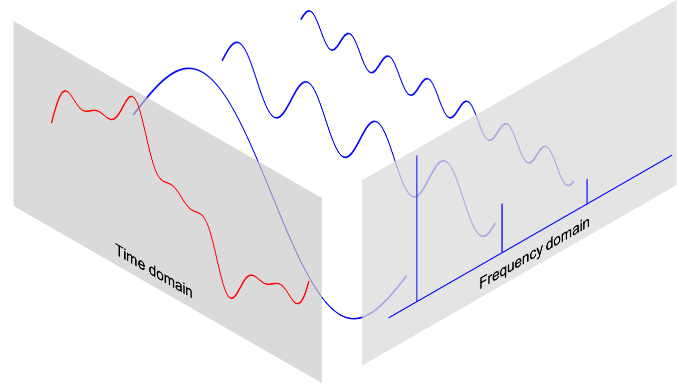

## Linear Combination using the standard basis

**Reminder from linear algebra:**

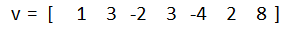

**can be repreented as a linear combination of the standard basis:**

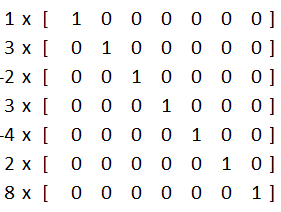

## Linear combination using sine waves

**standard basis is not mandatory: any basis with linearly independent vectors can be used**

A sample is a vector ($n$ points): $[s_0,s_1,\dots,s_{n-1}]$


Fourier: a sample of any arbitrary signal (function) can be represented as a linear combination of sine waves with frequencies in integer values.

**Q: what is the mean value of sine wave (with any combination of A,f,Φ)?**

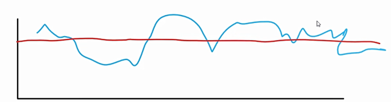

The problem: the mean of a sine wave is zero, therefore the linear combination will also be zero...

The solution: adding to it the mean of the sample.
$S=Asin(2\pi\times 0x+\phi)=Asin(\phi)=$const

This will be $F_0$ - frequency zero - normalized unit vector: $(\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n})$


$F_1$ – the base frequency - one cycle along the sampling. We will use $sin \frac{2\pi x}{n}$: $F_1=[0,sin \frac{2\pi\cdot 1}{n},sin \frac{2\pi\cdot 2}{n},\dots,sin \frac{2\pi\cdot (n-1)}{n}]$

$F_2$ – 2 cycles along the sampling - $sin \frac{2\pi \cdot 2x}{n}$

$F_3$ – 3 cycles along the sampling - $sin \frac{2\pi \cdot 3x}{n}$

$\dots$

$F_{n-1}$ – $(n-1)$ cycles along the sampling - $sin \frac{2\pi \cdot (n-1)x}{n}$

This way, we will get lineary independent vectors, from which we can reconstruct the original vector: $a_0F_0+a_1F_1+a_2F_2+\dots+a_nF_n$.  
($a_i$ is the amplitude of $F_i$)

Note: in order to not loosing the signal, the sample frequency should be at least twice the original signal frequency.

In the resulted Fourier Transform the X axis is not the time ($t$), but the Frequencies ($f$).

## Fourier Transform demo

In [ ]:
def sin_func(A=1,F=1,Φ=0):
    y1 = A * np.sin(2*π*x*F + π*Φ)
    y2 = A * np.sin((2*π*x*F + π*Φ) / 2 )
    y = y1 + y2
    pos_ylim = np.max([np.ceil(np.max(np.abs(y)))+1, 1])
    ylim = [-pos_ylim, +pos_ylim]
    plot_axis(plt, x, 'Time', y, 'A', xlim=[0, 3], ylim=ylim)
    plt.show()

interactive(sin_func,A=(0.25,4.0, 0.25),F=(0,4.0, 0.5), Φ=(-4.0,4.0, 0.5))

interactive(children=(FloatSlider(value=1.0, description='A', max=4.0, min=0.25, step=0.25), FloatSlider(value…

In [ ]:
def fft_plot(A1=1, F1=1, Φ1=0, A2=1, F2=2, Φ2=0):
    y1 = A1*np.sin(2*π*x*F1 + Φ1*π)
    y2 = A2*np.sin(2*π*x*F2 + Φ2*π)
    y = y1 + y2

    pos_ylim = np.max([np.ceil(np.max(np.abs(y)))+1, 1])
    ylim = [-pos_ylim, +pos_ylim]

    figure, axis = plt.subplots(4, 1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.4)
    plot_axis(axis[0], x, 'Time', y1, 'A', [0, 3], ylim)
    plot_axis(axis[1], x, 'Time', y2, 'A', [0, 3], ylim)
    plot_axis(axis[2], x, 'Time', y, 'A', [0, 3], ylim)
    fourier_transform = np.fft.fft(y)/len(y)           # Normalize amplitude
    fourier_transform = fourier_transform[range(int(len(y)/2))] # Exclude sampling frequency
    tp_count = len(y)
    values = np.arange(tp_count // 2)
    time_period = tp_count/sampling_frequency
    frequencies = values/time_period
    plot_axis(axis[3], frequencies, 'Frequency', 2*abs(fourier_transform), 'A', [-1, 5], [0, 1])
    plt.show()

interactive(fft_plot, A1=(0.25,4.0, 0.25), Φ1=(-4.0,4.0, 0.5), F1=(0,4.0, 0.5),A2=(0.25,4.0, 0.25), F2=(0,4.0, 0.5),Φ2=(-4.0,4.0, 0.5))

interactive(children=(FloatSlider(value=1.0, description='A1', max=4.0, min=0.25, step=0.25), FloatSlider(valu…

## Adding noise

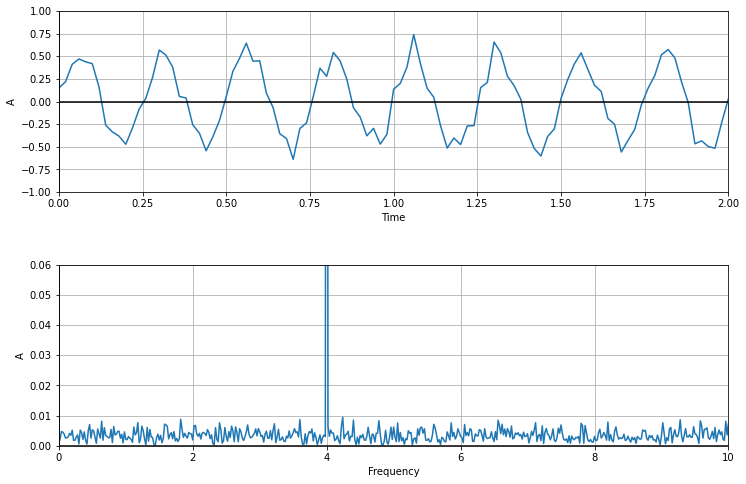

In [ ]:
A=0.5; F=4; noise_level = 0.1
ylim = [-1, +1]
sampling_frequency = 50
sampling_interval = 1 / sampling_frequency
begin_time = 0
end_time = 50
x = np.arange(begin_time, end_time, sampling_interval)
noise = np.random.normal(scale=noise_level, size=x.size)
y = A*np.sin(2*π*x*F) + noise
pos_ylim = np.max([np.ceil(np.max(np.abs(y)))+1, 1])
figure, axis = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)
plot_axis(splot=axis[0], x=x, xlabel='Time', y=y, ylabel='A', xlim=[0, 2], ylim=ylim)
fourier_transform = np.fft.fft(y)/len(y)           # Normalize amplitude
fourier_transform = fourier_transform[range(int(len(y)/2))] # Exclude sampling frequency
tp_count = len(y)
values = np.arange(tp_count // 2)
time_period = tp_count/sampling_frequency
frequencies = values/time_period
plot_axis(splot=axis[1], x=frequencies, xlabel='Frequency', y=2*abs(fourier_transform), ylabel='A',xlim=[0,10], ylim=[0,0.06])
plt.show()